In [1]:
import requests
from bs4 import BeautifulSoup
import json

LinesDict = {
             'Московского центрального кольца':'14', 
             'Московское центральное кольцо':'14', 
             'Большой кольцевой линии':'11', 
             'Большая кольцевая линия':'11', 
             'Кольцевой линии':'5',
             'Кольцевая линия':'5',
             'МЦД-2':'МЦД-2', 
             'МЦД-4':'МЦД-4', 
             'Калужско-Рижской линии':'6', 
             'Калужско-Рижская линия':'6', 
             'Люблинско-Дмитровской линии':'10', 
             'Люблинско-Дмитровская линия':'10', 
             'Таганско-Краснопресненской линии':'7', 
             'Таганско-Краснопресненская линия':'7', 
             'Замоскворецкой линии':'2', 
             'Замоскворецкая линия':'2', 
             'Арбатско-Покровской линии':'3', 
             'Арбатско-Покровская линия':'3', 
             'Филёвской линии':'4', 
             'Филёвская линия':'4', 
             'Серпуховско-Тимирязевской линии':'9', 
             'Серпуховско-Тимирязевская линия':'9', 
             'МЦД-3':'МЦД-3', 
             'МЦД-1':'МЦД-1', 
             'Сокольнической линии':'1', 
             'Сокольническая линия':'1',
             'Калининской линии':'8', 
             'Калининская линия':'8', 
             'Солнцевской линии':'8A', 
             'Солнцевская линия':'8A', 
             'Большая кольцевой линии':'11', 
             'Большая кольцевая линия':'11', 
             'Московского монорельса':'13', 
             'Московский монорельс':'13', 
             'Бутовской линии':'12', 
             'Бутовская линия':'12', 
             'Некрасовской линии':'15',
             'Некрасовская линия':'15'
            }
def parse_moscow_metro_stations():
    url = "https://ru.wikipedia.org/wiki/Список_станций_Московского_метрополитена"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    stations_table = soup.find_all("table", class_="standard sortable")
    rows = stations_table[0].find_all("tr")[1:]
    rows2 = stations_table[1].find_all("tr")[1:]
    stations_data = []
    titles = []

    for row in rows + rows2:
        columns = row.find_all("td")
        st_name = columns[1].find_all('a')[0].get('title')
        index = st_name.find('(')
        if index == -1:
            st_name += ' '
            index = len(st_name)
        metro_line = columns[0].find('a').get('title') 
        name = st_name[0:index] + '(' + LinesDict[metro_line] + ')'
        date_opened = columns[2].text.strip()
        coordinates = columns[6].find_all('a')[0]
        if coordinates.get('data-lat') == None:
            coordinates = columns[5].find_all('a')[0]
        latitude = coordinates.get('data-lat')
        longitude = coordinates.get('data-lon')
        transits = []
        transits_data = columns[3].find_all("a")
        for tr in transits_data:
            t = tr.get('title')
            if t != None:
                print(name, t)
                index1 = t.find('«')+1
                index2 = t.find('»')
                if index1 == -1 or index2 == -1:
                    index1 = t.find('(')
                    info = t[0:index1-1] 
                    #if info not in LinesDict:
                    #    transits.append(info + '(-1)') 
                        
                    if info in LinesDict and 'МЦД' not in info[0:3]:
                        transits.append(info + ' (' + LinesDict[info] + ')') 
                elif 'МЦД' not in t:
                    info = t[index2+2:]
                    if t[index1:index2] == 'Нижегородская)':
                        index2 -=1
                    transits.append(t[index1:index2] + ' (' + LinesDict[info] + ')') 
                
        connections = []
        if len(stations_data)>0:
            if stations_data[-1]['name'][-4:] == name[-4:]:
                connections = [stations_data[-1]['name']]
                
        station_info = {
            "name": name,
            "date_opened": date_opened,
            "latitude": latitude,
            "longitude": longitude,
            "connects": connections,
            "transits": transits
        }
        stations_data.append(station_info)
    for i in range(len(stations_data)-1):
        if stations_data[i+1]['name'][-4:] == stations_data[i]['name'][-4:]:
            stations_data[i]['connects'].append(stations_data[i+1]['name'])
            
        if stations_data[i]['name'] == 'Окружная (14)':
            stations_data[i]['connects'].append(stations_data[i+1]['name'])
        elif stations_data[i]['name'] == 'Лихоборы (14)':
            stations_data[i]['connects'].append('Окружная (14)')
        elif stations_data[i]['name'] == 'Киевская (5)':
            stations_data[i]['connects'].append('Парк культуры (5)')
        elif stations_data[i]['name'] == 'Парк культуры (5)':
            stations_data[i]['connects'].append('Киевская (5)')
        elif stations_data[i]['name'] == 'Марьина Роща (11)':
            stations_data[i]['connects'].append('Шелепиха (11)')
        elif stations_data[i]['name'] == 'Шелепиха (11)':
            stations_data[i]['connects'].append('Марьина Роща (11)')
    #print(titles)
    return stations_data

def save_to_json(data, filename):
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

stations_data = parse_moscow_metro_stations()
for st in stations_data[-20:]:
    print(st)
save_to_json(stations_data, "moscow_metro_stations.json")
print("Данные о станциях московского метрополитена сохранены в файле 'moscow_metro_stations.json'.")


Бульвар Рокоссовского (1) Переход на станцию «Бульвар Рокоссовского» Московского центрального кольца
Черкизовская (1) Переход на станцию «Локомотив» Московского центрального кольца
Сокольники (1) Переход на станцию «Сокольники» Большой кольцевой линии
Комсомольская (1) Переход на станцию «Комсомольская» Кольцевой линии
Комсомольская (1) Переход на станцию «Площадь трёх вокзалов» МЦД-2
Комсомольская (1) Переход на станцию «Площадь трёх вокзалов» МЦД-4
Чистые пруды (1) Переход на станцию «Тургеневская» Калужско-Рижской линии
Чистые пруды (1) Переход на станцию «Сретенский бульвар» Люблинско-Дмитровской линии
Лубянка (1) Переход на станцию «Кузнецкий Мост» Таганско-Краснопресненской линии
Охотный Ряд (1) Переход на станцию «Театральная» Замоскворецкой линии
Охотный Ряд (1) Переход на станцию «Площадь Революции» Арбатско-Покровской линии
Библиотека имени Ленина (1) Переход на станцию «Арбатская» Арбатско-Покровской линии
Библиотека имени Ленина (1) Переход на станцию «Александровский сад» 

In [2]:
MCD_url = {
    'МЦД-1': 'https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B8%D1%8F_%D0%9C%D0%A6%D0%94-1',
    'МЦД-2': 'https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B8%D1%8F_%D0%9C%D0%A6%D0%94-2', 
    'МЦД-3': 'https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B8%D1%8F_%D0%9C%D0%A6%D0%94-3',
    'МЦД-4': 'https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B8%D1%8F_%D0%9C%D0%A6%D0%94-4' 
}

# если понадобится добавить мцд 
import re
def parse_mcd_stations():
    for mcd in MCD_url:
        #print(MCD_url[mcd])
        response = requests.get(MCD_url[mcd])
        soup = BeautifulSoup(response.content, "html.parser")
        table = soup.find_all("table", class_="nogrid")
        for t in table:
            tmp_text = t.text
            #print(re.sub('\n+', '\n', tmp_text), '\n-----------------\n')
parse_mcd_stations()

In [3]:
from math import radians, sin, cos, sqrt, atan2
import numpy as np

# расстояние между станциями
def calculate_distance(lat1, lon1, lat2, lon2):
    # Радиус Земли в метрах
    R = 6371000.0

    # Преобразование градусов в радианы
    lat1_rad = radians(float(lat1))
    lon1_rad = radians(float(lon1))
    lat2_rad = radians(float(lat2))
    lon2_rad = radians(float(lon2))

    # Разница между широтами и долготами
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Формула гаверсинусов
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Вычисление расстояния
    distance = R * c
    return distance


def make_TGF(stations_info = 'moscow_metro_stations.json', Tij = 'transitions' , V = 150, Tst = 0.1, Ttr = 1):
    Graph_nodes = {}       #1: Театральная
    Graph_connections = {}   #'2 1': 10   между станциями 2 и 1 переход 10 секунд
                             # первое число больше второго
    Tij = open(Tij, "r").read().split('\n')
    json_data = open('moscow_metro_stations.json', "r").read()
    stations_info = json.loads(json_data)

    i = 0
    for station in stations_info:
        if station['name'] not in Graph_nodes.keys():
            Graph_nodes[station['name']] = i
            i += 1
        else:
            station_i = Graph_nodes[station['name']]
            
    for station in stations_info:     
        station_i = Graph_nodes[station['name']]
        for con in station['connects']:
            if con not in Graph_nodes.keys():
                Graph_nodes[con] = i
                station_j = i
                i += 1
                print('!!', con, i-1, station['name'] )
            else:
                station_j = Graph_nodes[con]
            tmp_str = str(max(station_j, station_i)) + ' ' + str(min(station_j, station_i))
            if tmp_str not in Graph_connections.keys():
                for tmp_station in stations_info:
                    if tmp_station['name'] == con:
                        d = calculate_distance(station['latitude'], station['longitude'],
                                                tmp_station['latitude'], tmp_station['longitude'])
                        Graph_connections[tmp_str] = np.round(Tst + d/V, 2)
                        break
                    
        print(station['name'])
        for con in station['transits']:
            if con not in Graph_nodes.keys():
                Graph_nodes[con] = i
                station_j = i
                i += 1
                print('!!!', con, i-1, station['name'] )
            else:
                station_j = Graph_nodes[con]
            tmp_str = str(max(station_j, station_i)) + ' ' + str(min(station_j, station_i))
            
            
            if tmp_str not in Graph_connections.keys():
                line_in_Tij = 0
                for line in Tij:
                    if (con in line) and (station['name'] in line):
                        ind = line.rfind(')')
                        dist = float(line[ind+1:])
                        Graph_connections[tmp_str] = dist
                        print('---- new transition ', tmp_str, con)
                        line_in_Tij = 1
                        break
                    if not line_in_Tij: 
                        Graph_connections[tmp_str] = Ttr
                        
    Graph_nodes_str = [str(Graph_nodes[x]) + ' ' + x + '\n' for x in Graph_nodes]
    Graph_connections_str = [x + ' ' + str(Graph_connections[x])+ '\n' for x in Graph_connections]
    print(Graph_nodes)
    print(Graph_connections)
    return ''.join(Graph_nodes_str + Graph_connections_str)

# рандомно заполняем время пересадок
file_transitions = open("transitions", "w")
for st in stations_data:
    if len(st['transits']) > 0:
        for tr in  st['transits']:
            r = np.round(np.random.rand()*5+5,2)
            file_transitions.write(st['name'] + tr + ' ' + str(r) + '\n')
file_transitions.close()

TGF_input = make_TGF()
with open("TGF", "w") as text_file:
    text_file.write(TGF_input)

Бульвар Рокоссовского (1)
---- new transition  274 0 Бульвар Рокоссовского (14)
Черкизовская (1)
---- new transition  275 1 Локомотив (14)
Преображенская площадь (1)
Сокольники (1)
---- new transition  245 3 Сокольники (11)
Красносельская (1)
Комсомольская (1)
---- new transition  91 5 Комсомольская (5)
Красные Ворота (1)
Чистые пруды (1)
---- new transition  106 7 Тургеневская (6)
---- new transition  203 7 Сретенский бульвар (10)
Лубянка (1)
---- new transition  132 8 Кузнецкий Мост (7)
Охотный Ряд (1)
---- new transition  37 9 Театральная (2)
---- new transition  63 9 Площадь Революции (3)
Библиотека имени Ленина (1)
---- new transition  62 10 Арбатская (3)
---- new transition  84 10 Александровский сад (4)
---- new transition  177 10 Боровицкая (9)
Кропоткинская (1)
Парк культуры (1)
---- new transition  85 12 Парк культуры (5)
Фрунзенская (1)
Спортивная (1)
---- new transition  289 14 Лужники (14)
Воробьёвы горы (1)
Университет (1)
Проспект Вернадского (1)
---- new transition  230

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

Colors_dict = {
    '(1)' : 'red',
    '(2)' : 'green',
    '(3)' : 'blue',
    '(4)' : 'lightblue',
    '(5)' : 'brown',
    '(6)' : 'orange',
    '(7)' : 'purple',
    '(8)' : 'yellow',
    '8A)' : 'yellow',
    '(9)' : 'grey',
    '10)' : 'lightgreen',
    '11)' : 'lightgrey',
    '12)' : 'magenta',
    '13)' : 'darkgrey',
    '14)' : 'white'
    
}

def find_shortest_way(TGF_input, num_stations = 300, num_draw = 80):
    Wij = np.zeros((num_stations, num_stations))
    TGF = TGF_input.split('\n')
    g = nx.Graph()
    color_map = []
    for cur_node in TGF[:num_stations]:
        ind = cur_node.find(' ')
        col = station_name = cur_node[-3:]
        if col in Colors_dict:
            col = Colors_dict[col]
            color_map.append(col)
        else:
            col = 'black'
            color_map.append(col)
        g.add_node(int(cur_node[:ind]), station_name = cur_node[ind+1:])
        #print(int(cur_node[:ind]))
        
    for new_edge in TGF[num_stations:]:
        cur_path = new_edge.split(' ')
        if len(cur_path) > 2:
            col = 'black'
            if len(color_map) > int(cur_path[0]) and color_map[int(cur_path[0])] == color_map[int(cur_path[1])]:
                col = color_map[int(cur_path[0])]
            g.add_edge(int(cur_path[0]), int(cur_path[1]), weight=float(cur_path[2]), color = col)
            g.add_edge(int(cur_path[1]), int(cur_path[0]), weight=float(cur_path[2]), color = col)
    
    for i in range(num_stations):
    #for i in range(num_draw):
        if i%10 == 0:
            print(i)
        for j in range(i+1, num_stations):
            #print(i, j)
            if not nx.has_path(g, i, j):
                print('no path:', i, j, g.nodes[i]['station_name'], g.nodes[j]['station_name'])
                continue
            else:
                path = nx.shortest_path(g, source=i, target=j, weight='weight')
                total_weight = 0
                for p in range(len(path)-1):
                    total_weight+= g[path[p]][path[p+1]]["weight"]
                Wij[i,j] = total_weight
    return Wij, g, color_map
    
TGF_input = open('TGF', "r").read()
Wij, G, color_map = find_shortest_way(TGF_input)
Wij

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


array([[  0.  ,   9.37,  23.04, ..., 154.46, 168.83, 183.12],
       [  0.  ,   0.  ,  13.67, ..., 145.09, 159.46, 173.75],
       [  0.  ,   0.  ,   0.  , ..., 131.42, 145.79, 160.08],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,  14.37,  28.66],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,  14.29],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

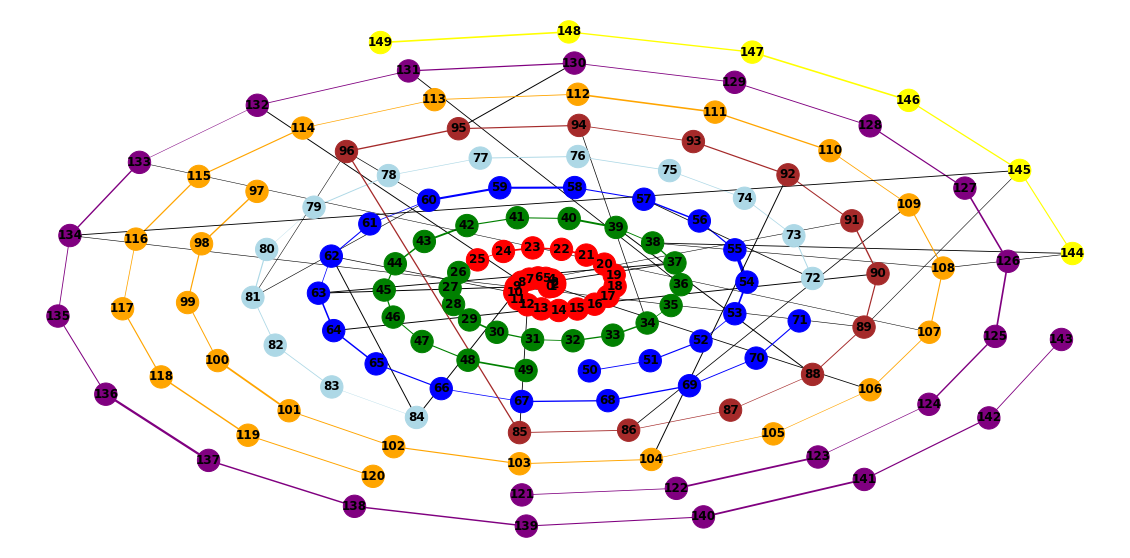

In [5]:
f, ax = plt.subplots(figsize=(20, 10))
num_draw = 150
H = nx.subgraph(G, np.arange(0,num_draw).tolist())
weights = [H[u][v]['weight']/10 for u,v in H.edges()]
edge_colors = [H[u][v]['color'] for u,v in  H.edges()]
    
nx.draw(H,  pos = nx.spiral_layout(H), with_labels=True, font_weight='bold', \
            node_color=color_map[:num_draw], edge_color=edge_colors, \
            width=weights, node_size=500)

#nx.draw(g, with_labels=True)
plt.show()

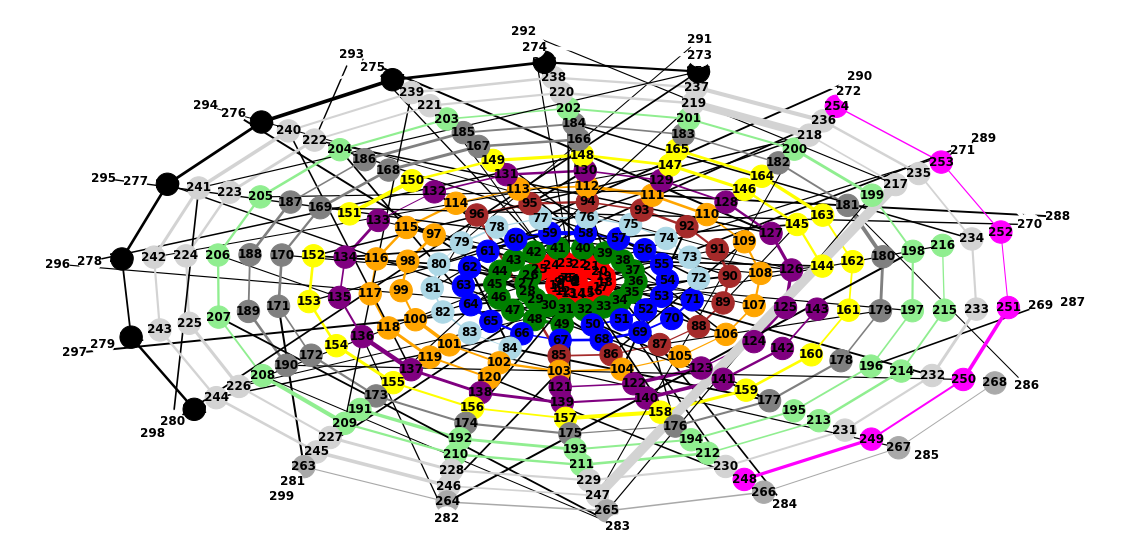

In [6]:
f, ax = plt.subplots(figsize=(20, 10))
num_draw = 300
H = nx.subgraph(G, np.arange(0,num_draw).tolist())
weights = [H[u][v]['weight']/5 for u,v in H.edges()]
edge_colors = [H[u][v]['color'] for u,v in  H.edges()]
    
nx.draw(H,  pos = nx.spiral_layout(H), with_labels=True, font_weight='bold', \
            node_color=color_map[:num_draw], edge_color=edge_colors, \
            width=weights, node_size=500)

#nx.draw(g, with_labels=True)
plt.show()

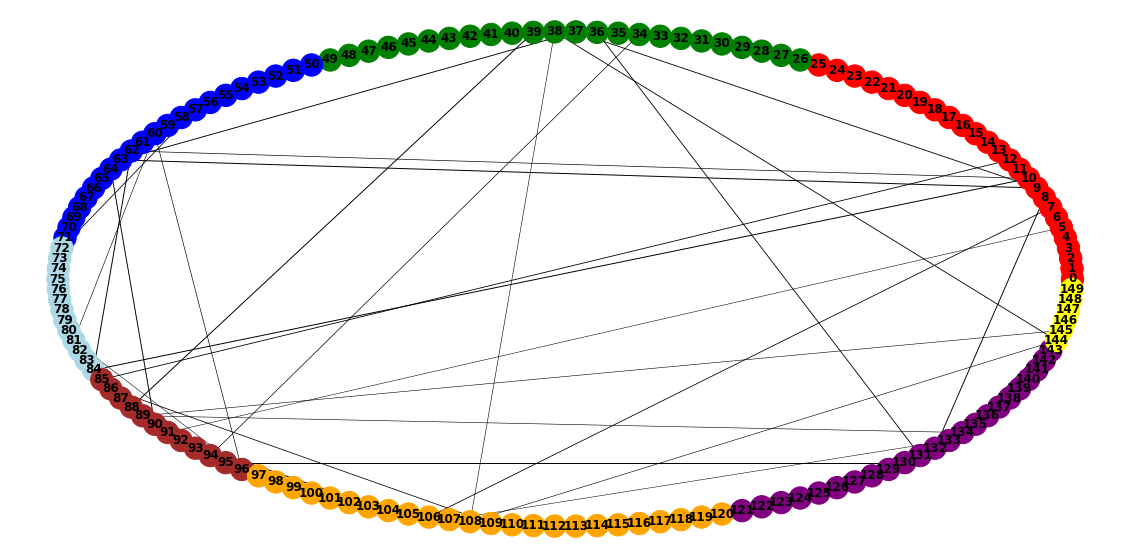

In [7]:
f, ax = plt.subplots(figsize=(20, 10))
num_draw = 150
H = nx.subgraph(G, np.arange(0,num_draw).tolist())
weights = [H[u][v]['weight']/10 for u,v in H.edges()]
edge_colors = [H[u][v]['color'] for u,v in  H.edges()]
    
nx.draw(H,  pos = nx.shell_layout(H), with_labels=True, font_weight='bold', \
            node_color=color_map[:num_draw], edge_color=edge_colors, \
            width=weights, node_size=500)

#nx.draw(g, with_labels=True)
plt.show()

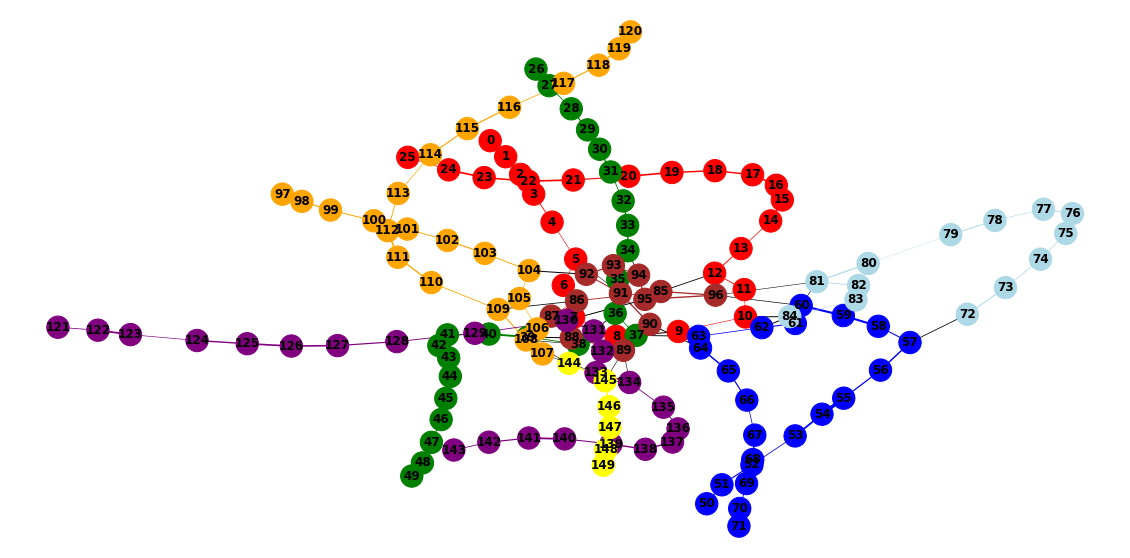

In [8]:
f, ax = plt.subplots(figsize=(20, 10))
num_draw = 150
H = nx.subgraph(G, np.arange(0,num_draw).tolist())
weights = [H[u][v]['weight']/10 for u,v in H.edges()]
edge_colors = [H[u][v]['color'] for u,v in  H.edges()]
    
nx.draw(H,  pos = nx.spring_layout(H), with_labels=True, font_weight='bold', \
            node_color=color_map[:num_draw], edge_color=edge_colors, \
            width=weights, node_size=500)

#nx.draw(g, with_labels=True)
plt.show()

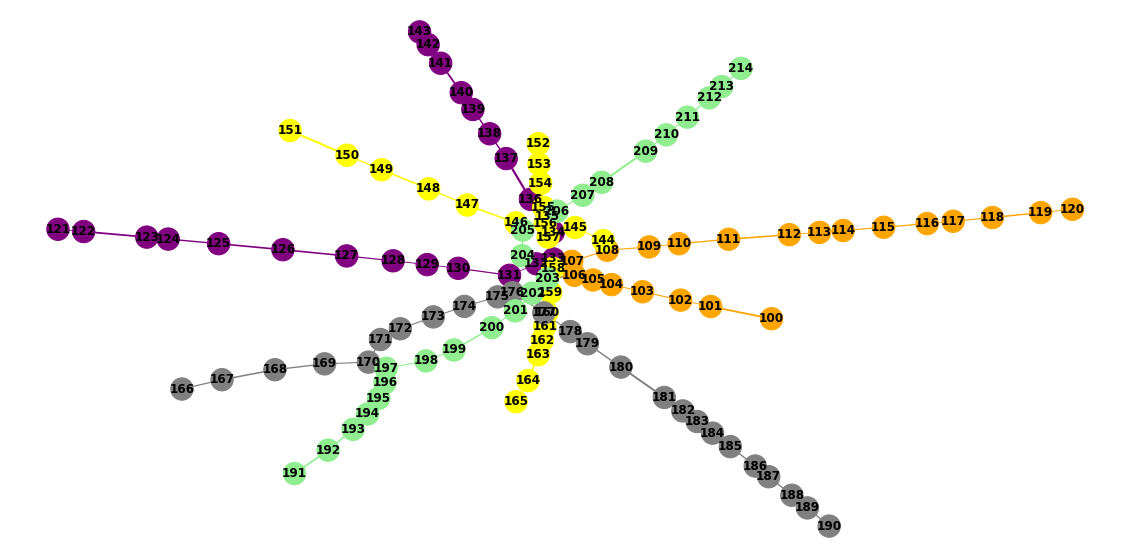

In [9]:
f, ax = plt.subplots(figsize=(20, 10))
num_draw = 115
H = nx.subgraph(G, np.arange(100,100+num_draw).tolist())
weights = [H[u][v]['weight']/10 for u,v in H.edges()]
edge_colors = [H[u][v]['color'] for u,v in  H.edges()]
    
nx.draw(H,  pos = nx.kamada_kawai_layout(H), with_labels=True, font_weight='bold', \
            node_color=color_map[100:100+num_draw], edge_color=edge_colors, \
            width=weights, node_size=500)

#nx.draw(g, with_labels=True)
plt.show()

In [10]:
#def closer_to_center(stations_data, station1, station2):
    


def change_TGF(stations_info = 'moscow_metro_stations.json', Tij = 'transitions' , V = 150, Tst = 0.1, Ttr = 1):
    Graph_nodes = {}       #1: Театральная
    Graph_connections = {}   #'2 1': 10   между станциями 2 и 1 переход 10 секунд
                             # первое число больше второго
    Tij = open(Tij, "r").read().split('\n')
    json_data = open('moscow_metro_stations.json', "r").read()
    stations_info = json.loads(json_data)
    i = 0
    lat_center = '55.7577'
    lon_center = '37.6166'
    for st in stations_data:
        if st['name'][-4:] == '(14)':
            print(st['name'], st['transits'])
            new_transits = ''
            for tr in st['transits']:
                for st1 in stations_data:
                    if st1['name'] == tr:
                        #print('\t\t', st1['name'])
                        #st1['transits'].remove(st['name'])
                        #пытаемся понять, кто ближе к центру
                        if len(st1['connects']) == 1:
                            print('--------', st1['name'])
                        else:
                            connected_st1 = st1['connects'][0]
                            connected_st2 = st1['connects'][1]
                            #print('\t\t', connected_st1, connected_st2)
                            for tmp_st in stations_data:
                                if tmp_st['name'] == connected_st1:
                                    connected_st1 = tmp_st
                                elif tmp_st['name'] == connected_st2:
                                    connected_st2 = tmp_st
                                if not isinstance(connected_st1, str) and not isinstance(connected_st2, str):
                                    break
                            dist1 = calculate_distance(lat_center, lon_center, connected_st1['latitude'], connected_st1['longitude'])
                            dist2 = calculate_distance(lat_center, lon_center, connected_st2['latitude'], connected_st2['longitude'])
                            if dist1 > dist2: 
                                print('---', connected_st2['name'], '| closer to center than |', connected_st1['name'])
                            else:
                                print('---', connected_st1['name'], '| closer to center than |', connected_st2['name'])
            #stations_data[i]['connects'].append(stations_data[i+1]['name'])
            
change_TGF()

Окружная (14) ['Окружная (10)']
--- Петровско-Разумовская (10) | closer to center than | Верхние Лихоборы (10)
Владыкино (14) ['Владыкино (9)']
--- Петровско-Разумовская (9) | closer to center than | Отрадное (9)
Ботанический сад (14) ['Ботанический сад (6)']
--- ВДНХ (6) | closer to center than | Свиблово (6)
Ростокино (14) []
Белокаменная (14) []
Бульвар Рокоссовского (14) ['Бульвар Рокоссовского (1)']
-------- Бульвар Рокоссовского (1)
Локомотив (14) ['Черкизовская (1)']
--- Преображенская площадь (1) | closer to center than | Бульвар Рокоссовского (1)
Измайлово (14) ['Партизанская (3)']
--- Семёновская (3) | closer to center than | Измайловская (3)
Соколиная Гора (14) []
Шоссе Энтузиастов (14) ['Шоссе Энтузиастов (8)']
--- Авиамоторная (8) | closer to center than | Перово (8)
Андроновка (14) []
Нижегородская (14) ['Нижегородская (11)', 'Нижегородская (15)']
--- Авиамоторная (11) | closer to center than | Текстильщики (11)
-------- Нижегородская (15)
Новохохловская (14) []
Угрешская

In [11]:
#def closer_to_center(stations_data, station1, station2):
    


def change_TGF(stations_info = 'moscow_metro_stations.json', closer = 1):
    json_data = open('moscow_metro_stations.json', "r").read()
    stations_info = json.loads(json_data)
    i = 0
    lat_center = '55.7577'
    lon_center = '37.6166'
    for i in range(len(stations_data)):
        if stations_data[i]['name'][-4:] == '(14)':
            #print(stations_data[i]['name'], stations_data[i]['transits'])
            new_transits = ''
            for tr in stations_data[i]['transits']:
                stations_data[i]['transits'].remove(tr)
                for j in range(len(stations_data)):
                    if stations_data[j]['name'] == tr:
                        #print('\t\t', stations_data[j], stations_data[i])
                        if stations_data[i]['name'] in stations_data[j]['transits']:
                            stations_data[j]['transits'].remove( stations_data[i]['name'])
                        #пытаемся понять, кто ближе к центру
                        if len(stations_data[j]['connects']) == 1:
                            print('--------', stations_data[j]['name'])
                        else:
                            connected_st1 = stations_data[j]['connects'][0]
                            connected_st2 = stations_data[j]['connects'][1]
                            #print('\t\t', connected_st1, connected_st2)
                            for con_i in range(len(stations_data)):
                                if stations_data[con_i]['name'] == connected_st1:
                                    connected_st1 = con_i
                                elif stations_data[con_i]['name'] == connected_st2:
                                    connected_st2 = con_i
                                if not isinstance(connected_st1, str) and not isinstance(connected_st2, str):
                                    break
                            dist1 = calculate_distance(lat_center, lon_center, stations_data[connected_st1]['latitude'], stations_data[connected_st1]['longitude'])
                            dist2 = calculate_distance(lat_center, lon_center, stations_data[connected_st2]['latitude'], stations_data[connected_st2]['longitude'])
                            if dist1 > dist2: 
                                print('---', stations_data[connected_st2]['name'], '| closer to center than |', stations_data[connected_st1]['name'])
                                if closer:
                                    stations_data[connected_st2]['transits'].append(stations_data[i]['name'])
                                    stations_data[i]['transits'].append(stations_data[connected_st2]['name'])
                                else:
                                    stations_data[connected_st1]['transits'].append(stations_data[i]['name'])
                                    stations_data[i]['transits'].append(stations_data[connected_st1]['name'])
                            else:
                                print('---', stations_data[connected_st1]['name'], '| closer to center than |', stations_data[connected_st2]['name'])
                                if closer:
                                    stations_data[connected_st1]['transits'].append(stations_data[i]['name'])
                                    stations_data[i]['transits'].append(stations_data[connected_st1]['name'])
                                else:
                                    stations_data[connected_st2]['transits'].append(stations_data[i]['name'])
                                    stations_data[i]['transits'].append(stations_data[connected_st2]['name'])
    return stations_data

stations_data = parse_moscow_metro_stations()
save_to_json(stations_data, "moscow_metro_stations.json")
for st in stations_data[-20:]:
    print(st)
    
stations_data = change_TGF(stations_info = 'moscow_metro_stations.json')
save_to_json(stations_data, "moscow_metro_stations1.json")
for st in stations_data[-20:]:
    print(st)

Бульвар Рокоссовского (1) Переход на станцию «Бульвар Рокоссовского» Московского центрального кольца
Черкизовская (1) Переход на станцию «Локомотив» Московского центрального кольца
Сокольники (1) Переход на станцию «Сокольники» Большой кольцевой линии
Комсомольская (1) Переход на станцию «Комсомольская» Кольцевой линии
Комсомольская (1) Переход на станцию «Площадь трёх вокзалов» МЦД-2
Комсомольская (1) Переход на станцию «Площадь трёх вокзалов» МЦД-4
Чистые пруды (1) Переход на станцию «Тургеневская» Калужско-Рижской линии
Чистые пруды (1) Переход на станцию «Сретенский бульвар» Люблинско-Дмитровской линии
Лубянка (1) Переход на станцию «Кузнецкий Мост» Таганско-Краснопресненской линии
Охотный Ряд (1) Переход на станцию «Театральная» Замоскворецкой линии
Охотный Ряд (1) Переход на станцию «Площадь Революции» Арбатско-Покровской линии
Библиотека имени Ленина (1) Переход на станцию «Арбатская» Арбатско-Покровской линии
Библиотека имени Ленина (1) Переход на станцию «Александровский сад» 

In [12]:
# рандомно заполняем время пересадок
file_transitions = open("transitions1", "w")
for st in stations_data:
    if len(st['transits']) > 0:
        for tr in  st['transits']:
            r = np.round(np.random.rand()*5+5,2)
            print(st['name'], tr)
            file_transitions.write(st['name'] + tr + ' ' + str(r) + '\n')
file_transitions.close()

TGF_input = make_TGF(stations_info = 'moscow_metro_stations1.json', Tij = 'transitions1')
with open("TGF1", "w") as text_file:
    text_file.write(TGF_input)
TGF_input = open('TGF1', "r").read()
Wij_new, G1, color_map1 = find_shortest_way(TGF_input)
Wij_new

Преображенская площадь (1) Локомотив (14)
Сокольники (1) Сокольники (11)
Комсомольская (1) Комсомольская (5)
Чистые пруды (1) Тургеневская (6)
Чистые пруды (1) Сретенский бульвар (10)
Лубянка (1) Кузнецкий Мост (7)
Охотный Ряд (1) Театральная (2)
Охотный Ряд (1) Площадь Революции (3)
Библиотека имени Ленина (1) Арбатская (3)
Библиотека имени Ленина (1) Александровский сад (4)
Библиотека имени Ленина (1) Александровский сад (4)
Библиотека имени Ленина (1) Боровицкая (9)
Парк культуры (1) Парк культуры (5)
Фрунзенская (1) Лужники (14)
Проспект Вернадского (1) Проспект Вернадского (11)
Сокол (2) Стрешнево (14)
Сокол (2) Балтийская (14)
Динамо (2) Петровский парк (11)
Белорусская (2) Белорусская (5)
Тверская (2) Пушкинская (7)
Тверская (2) Чеховская (9)
Театральная (2) Охотный Ряд (1)
Театральная (2) Площадь Революции (3)
Новокузнецкая (2) Третьяковская (6)
Новокузнецкая (2) Третьяковская (8)
Павелецкая (2) Павелецкая (5)
Павелецкая (2) Автозаводская (14)
Каширская (2) Каширская (11)
Красн

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


array([[  0.  ,   9.37,  23.04, ..., 149.14, 163.51, 177.8 ],
       [  0.  ,   0.  ,  13.67, ..., 139.77, 154.14, 168.43],
       [  0.  ,   0.  ,   0.  , ..., 126.1 , 140.47, 154.76],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,  14.37,  28.66],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,  14.29],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

In [13]:
Wij_new-Wij

array([[ 0.  ,  0.  ,  0.  , ..., -5.32, -5.32, -5.32],
       [ 0.  ,  0.  ,  0.  , ..., -5.32, -5.32, -5.32],
       [ 0.  ,  0.  ,  0.  , ..., -5.32, -5.32, -5.32],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [22]:
import pandas as pd

def array_to_html_table(array, titles = []):
    """
    Функция для преобразования массива NumPy в HTML-таблицу.

    Параметры:
    - array: массив NumPy

    Возвращает:
    - строку, содержащую HTML-таблицу
    """
    # Преобразуем массив в DataFrame с помощью pandas
    array = np.mean(array, axis = 1)
    df = pd.DataFrame(array, index=titles)

    # Преобразуем DataFrame в HTML-таблицу
    html_table = df.to_html(index=True)

    return html_table

titles = []
tgf_data = open('TGF', "r").read().split('\n')
for cur_node in tgf_data[:300]:
    ind = cur_node.find(' ')
    station_name = cur_node[ind+1:]
    #print(station_name)
    titles.append(station_name)
    
html_table = array_to_html_table(Wij-Wij_new, titles)
with open("table_metro.html", "w") as text_file:
    text_file.write(html_table)

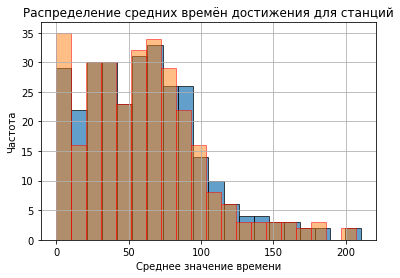

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_row_means_histogram(matrix, matrix2 = None):
    """
    Функция для построения гистограммы распределения средних чисел для каждой строки матрицы.

    Параметры:
    - matrix: матрица чисел (2D NumPy array)

    Вывод:
    - гистограмма распределения средних чисел для каждой строки
    """
    # Вычисляем средние значения для каждой строки
    row_means = np.sum(matrix, axis=1)/len(matrix)

    # Строим гистограмму распределения средних чисел
    plt.hist(row_means, bins=20, edgecolor='black',alpha = 0.7)
    plt.title('Распределение средних времён достижения для станций')
    plt.xlabel('Среднее значение времени')
    plt.ylabel('Частота')
    plt.grid(True)
    
    if matrix2.any() != None:
        row_means = np.sum(matrix2, axis=1)/len(matrix)
        # Строим гистограмму распределения средних чисел
        plt.hist(row_means, bins=20, edgecolor='red',alpha = 0.5)
    plt.show()

plot_row_means_histogram(Wij, Wij_new)
